In [1]:
import pandas as pd
from darts import TimeSeries
from darts.utils.statistics import check_seasonality,granger_causality_tests,stationarity_tests
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# !pip install darts --upgrade

In [1]:
print('hello')

hello


In [3]:
data = pd.read_csv("data/open-meteo-12.97N77.56E918m_blr_hr.csv",header=3,parse_dates=['time'])
data.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
0,2023-01-01 00:00:00,16.2,74,11.7,0.0,0,914.8,1,0.02,0.47,9.4,97,15.1,0
1,2023-01-01 01:00:00,16.1,75,11.6,0.0,0,914.1,0,0.02,0.46,9.8,96,16.2,0
2,2023-01-01 02:00:00,15.6,80,12.1,0.0,3,913.3,83,0.01,0.36,9.8,96,16.2,0
3,2023-01-01 03:00:00,15.3,84,12.7,0.0,2,913.0,78,0.00,0.27,10.2,100,16.9,0
4,2023-01-01 04:00:00,14.8,89,13.1,0.0,2,912.9,61,0.00,0.18,9.1,99,16.9,0


In [4]:
data.isnull().sum()

time                               0
temperature_2m (°C)                0
relative_humidity_2m (%)           0
dew_point_2m (°C)                  0
rain (mm)                          0
weather_code (wmo code)            0
surface_pressure (hPa)             0
cloud_cover (%)                    0
et0_fao_evapotranspiration (mm)    0
vapour_pressure_deficit (kPa)      0
wind_speed_10m (km/h)              0
wind_direction_10m (°)             0
wind_gusts_10m (km/h)              0
is_day ()                          0
dtype: int64

In [5]:
data.describe()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
count,22086,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000,22086.000000
mean,2024-04-05 02:30:00,23.836430,67.046002,16.007770,0.100100,10.153763,911.242552,67.496242,0.200519,1.165989,12.140818,170.152314,25.792842,0.509282
min,2023-01-01 00:00:00,11.800000,10.000000,-4.400000,0.000000,0.000000,903.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000
25%,2023-08-19 01:15:00,20.600000,50.000000,13.700000,0.000000,1.000000,909.400000,26.000000,0.010000,0.280000,8.400000,92.000000,18.700000,0.000000
50%,2024-04-05 02:30:00,23.100000,71.000000,17.800000,0.000000,3.000000,911.200000,95.000000,0.080000,0.820000,11.700000,139.000000,24.500000,1.000000
75%,2024-11-21 03:45:00,26.800000,88.000000,19.300000,0.000000,3.000000,913.100000,100.000000,0.370000,1.710000,15.300000,257.000000,32.000000,1.000000
max,2025-07-09 05:00:00,39.400000,100.000000,23.200000,15.000000,65.000000,920.000000,100.000000,0.970000,5.870000,39.300000,360.000000,73.800000,1.000000
std,NaN,4.359984,23.677957,4.500644,0.527614,18.849277,2.650848,39.967547,0.239545,1.104018,5.266412,89.175784,10.166250,0.499925


In [6]:
# data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['hour'] = data['time'].dt.hour
normalized_hours = ((data['time'].dt.hour / 24) * 2 * np.pi) - ((2 / 24) * 2 * np.pi)
data['daily_cycle'] = (-np.cos(normalized_hours) + 1) / 2
# normalized_months = ((data['month'] / 12) * 2 * np.pi) + ((2 / 12) * 2 * np.pi)
# data['monthly_cycle'] = (-np.cos(normalized_months) + 1) / 2

data.tail()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day (),month,hour,daily_cycle
22081,2025-07-09 01:00:00,20.8,89,19.0,0.0,2,909.9,51,0.01,0.27,13.8,252,32.0,0,7,1,0.017037
22082,2025-07-09 02:00:00,20.4,89,18.6,0.0,2,909.2,60,0.00,0.25,13.4,252,31.0,0,7,2,0.000000
22083,2025-07-09 03:00:00,20.0,91,18.4,0.0,3,908.9,94,0.00,0.21,12.6,251,30.2,0,7,3,0.017037
22084,2025-07-09 04:00:00,19.7,92,18.4,0.0,3,908.9,94,0.00,0.18,13.6,250,29.5,0,7,4,0.066987
22085,2025-07-09 05:00:00,19.6,92,18.2,0.0,3,909.1,100,0.00,0.19,14.6,252,32.0,0,7,5,0.146447


In [7]:
data.corr()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day (),month,hour,daily_cycle
time,1.000000,0.045070,0.057194,0.122936,0.026239,0.071399,-0.169257,0.053846,-0.029203,-0.022827,-0.062417,0.011873,0.159558,0.004966,0.102761,0.000474,-0.000078
temperature_2m (°C),0.045070,1.000000,-0.814183,-0.357595,-0.028703,0.019194,0.078232,-0.091115,0.817694,0.895800,0.061319,0.036623,0.312699,0.581852,-0.130086,0.363950,0.772264
relative_humidity_2m (%),0.057194,-0.814183,1.000000,0.789230,0.124809,0.196448,-0.372800,0.361237,-0.732559,-0.951394,-0.024202,0.281817,-0.232503,-0.429785,0.382114,-0.353431,-0.647275
dew_point_2m (°C),0.122936,-0.357595,0.789230,1.000000,0.160476,0.348675,-0.485971,0.456114,-0.396701,-0.718299,0.021318,0.510230,-0.066074,-0.100908,0.490956,-0.155375,-0.241855
rain (mm),0.026239,-0.028703,0.124809,0.160476,1.000000,0.488181,-0.147678,0.133814,-0.036548,-0.105842,0.015021,0.074354,0.065322,0.064645,0.080396,0.076176,0.103581
weather_code (wmo code),0.071399,0.019194,0.196448,0.348675,0.488181,1.000000,-0.311289,0.322126,0.036474,-0.165811,0.216331,0.248487,0.263403,0.191563,0.215514,0.096277,0.225234
surface_pressure (hPa),-0.169257,0.078232,-0.372800,-0.485971,-0.147678,-0.311289,1.000000,-0.381677,0.256087,0.279599,-0.147581,-0.519075,-0.105489,0.102980,-0.237569,0.081570,0.095072
cloud_cover (%),0.053846,-0.091115,0.361237,0.456114,0.133814,0.322126,-0.381677,1.000000,-0.104991,-0.282133,0.204270,0.304169,0.170163,0.049290,0.362281,-0.006181,0.026248
et0_fao_evapotranspiration (mm),-0.029203,0.817694,-0.732559,-0.396701,-0.036548,0.036474,0.256087,-0.104991,1.000000,0.788475,0.182756,-0.056965,0.444240,0.708672,-0.125943,0.148239,0.792476
vapour_pressure_deficit (kPa),-0.022827,0.895800,-0.951394,-0.718299,-0.105842,-0.165811,0.279599,-0.282133,0.788475,1.000000,0.018910,-0.223244,0.245133,0.467233,-0.326422,0.314253,0.664276


In [8]:
data.columns

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'weather_code (wmo code)',
       'surface_pressure (hPa)', 'cloud_cover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'month', 'hour', 'daily_cycle'],
      dtype='object')

In [9]:
# import importlib
import plotly_ts
# # importlib.reload(plotly_ts)
# plotly_ts.plotly_ts(data)

In [10]:
data.columns[1:].values

array(['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'weather_code (wmo code)',
       'surface_pressure (hPa)', 'cloud_cover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)',
       'wind_gusts_10m (km/h)', 'is_day ()', 'month', 'hour',
       'daily_cycle'], dtype=object)

In [11]:
series = TimeSeries.from_dataframe(data,time_col='time', value_cols=data.columns[1:].values,fill_missing_dates=True)


In [12]:
# for col in data.columns[1:]:
#     print(col," -- ",stationarity_tests(series[col]))

In [13]:
for col in data.columns[1:]:
    print(col," -- ",check_seasonality(series[col]))

temperature_2m (°C)  --  (False, 0)
relative_humidity_2m (%)  --  (False, 0)
dew_point_2m (°C)  --  (False, 0)
rain (mm)  --  (True, 12)
weather_code (wmo code)  --  (False, 0)
surface_pressure (hPa)  --  (True, 12)
cloud_cover (%)  --  (True, 23)
et0_fao_evapotranspiration (mm)  --  (False, 0)
vapour_pressure_deficit (kPa)  --  (False, 0)
wind_speed_10m (km/h)  --  (False, 0)
wind_direction_10m (°)  --  (False, 0)
wind_gusts_10m (km/h)  --  (False, 0)
is_day ()  --  (False, 0)
month  --  (False, 0)
hour  --  (False, 0)
daily_cycle  --  (False, 0)


In [14]:
def split_ts(series,y_col,x_past,x_future,before1 , before2):
    assert before2>before1
    train, test = series.split_before(before1)
    test_in , test_out = test.split_before(before2)
    # display(train)
    train_y , train_X_past ,train_X_future  = train[y_col] , train[x_past] ,train[x_future]
    test_in_y,test_in_X_past ,test_in_X_future  = test_in[y_col] , test_in[x_past] ,test_in[x_future]
    test_out_y,test_out_X_past,test_out_X_future = test_out[y_col] , test_out[x_past],test_out[x_future]  

    return train_y , train_X_past ,train_X_future  , test_in_y,test_in_X_past ,test_in_X_future , test_out_y,test_out_X_past,test_out_X_future
    

In [15]:
y = 'temperature_2m (°C)'
x_past = [ 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'weather_code (wmo code)',
       'surface_pressure (hPa)', 'cloud_cover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)',
       'wind_gusts_10m (km/h)']
x_future = ['hour','month'] #daily_cycle
train_y , train_X_past ,train_X_future  ,\
test_in_y,test_in_X_past ,test_in_X_future , \
test_out_y,test_out_X_past,test_out_X_future = split_ts(series,y,x_past,x_future,
                                        pd.Timestamp('2025-01-01 00:00') , pd.Timestamp('2025-05-01 00:00'))

In [16]:
train_y.end_time()

Timestamp('2024-12-31 23:00:00')

In [17]:
from darts.models import LinearRegressionModel, ExponentialSmoothing ,XGBModel , AutoARIMA , ARIMA , NBEATSModel,BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.dataprocessing.pipeline import Pipeline

In [28]:
from darts.metrics.metrics import rmse,mape

In [19]:
model_xgb =  XGBModel(
    lags=72,
    lags_past_covariates=72,lags_future_covariates=[24,24],
    output_chunk_length=24,
    random_state= 100,)

model_xgb.fit(train_y,train_X_past ,train_X_future)

XGBModel(lags=72, lags_past_covariates=72, lags_future_covariates=[24, 24], output_chunk_length=24, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=100, multi_models=True, use_static_covariates=True)

In [68]:
model_xgb.backtest(train_y,train_X_past ,train_X_future,forecast_horizon=24,last_points_only =False,retrain=False,metric=[rmse,mape])

array([0.34557439, 1.1927418 ])

In [61]:
hist_for = model_xgb.historical_forecasts(series=test_in_y.concatenate(test_out_y),past_covariates=test_in_X_past.concatenate(test_out_X_past),future_covariates=test_in_X_future.concatenate(test_out_X_future),forecast_horizon=24,stride=1,last_points_only =False,retrain=False)

In [64]:
hist_for

[<TimeSeries (time: 24, component: 1, sample: 1)> Size: 96B
 array([[[16.821321]],
 
        [[16.523443]],
 
        [[16.28336 ]],
 
        [[16.04975 ]],
 
        [[15.452179]],
 
        [[15.163546]],
 
        [[16.141333]],
 
        [[16.081894]],
 
        [[17.325123]],
 
        [[20.231993]],
 
 ...
 
        [[25.875385]],
 
        [[26.398947]],
 
        [[25.909782]],
 
        [[24.004532]],
 
        [[22.65193 ]],
 
        [[21.477278]],
 
        [[20.940256]],
 
        [[19.989128]],
 
        [[19.237438]],
 
        [[17.817001]]], dtype=float32)
 Coordinates:
   * time       (time) datetime64[ns] 192B 2025-01-04 ... 2025-01-04T23:00:00
   * component  (component) object 8B 'temperature_2m (°C)'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None
     metadata:           None,
 <TimeSeries (time: 24, component: 1, sample: 1)> Size: 96B
 array([[[16.30767 ]],
 
        [[15.583418]],
 
        [[15.

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.


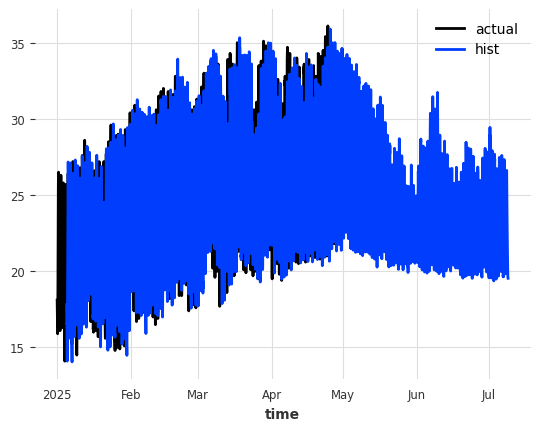

In [ ]:
prediction2=model_xgb.predict(24,series=test_in_y[:1000],past_covariates=test_in_X_past.concatenate(test_out_X_past),future_covariates=test_in_X_future.concatenate(test_out_X_future))

prediction2
# train_y.plot(label='Train', lw=2)
test_in_y.plot(label='actual', lw=2)
# test_out_y.plot(label='actual', lw=2)
hist_for.plot(label='hist', lw=2)
# prediction2.plot(label='forecast', lw=2)
plt.legend()
plt.show()

In [65]:
prediction3=model_xgb.predict(24,series=test_in_y[:pd.Timestamp('2025-01-04 21:00')],past_covariates=test_in_X_past.concatenate(test_out_X_past),future_covariates=test_in_X_future.concatenate(test_out_X_future))
prediction3.to_dataframe()

,temperature_2m (°C)
time,
2025-01-04 22:00:00,18.788700
2025-01-04 23:00:00,17.513672
2025-01-05 00:00:00,17.721251
2025-01-05 01:00:00,16.852972
2025-01-05 02:00:00,16.494503
2025-01-05 03:00:00,16.214024
2025-01-05 04:00:00,15.805992
2025-01-05 05:00:00,15.437578
2025-01-05 06:00:00,15.072325


In [58]:
test_in_y[:pd.Timestamp('2025-01-04 23:00')]

<TimeSeries (time: 96, component: 1, sample: 1)> Size: 768B
array([[[18.1]],

       [[17.5]],

       [[17. ]],

       [[16.7]],

       [[16.3]],

       [[15.9]],

       [[16.7]],

       [[17.1]],

       [[19. ]],

       [[21.2]],

...

       [[25.7]],

       [[25.5]],

       [[24.8]],

       [[23.7]],

       [[22.7]],

       [[21.7]],

       [[20.5]],

       [[19.6]],

       [[18.7]],

       [[18. ]]])
Coordinates:
  * time       (time) datetime64[ns] 768B 2025-01-01 ... 2025-01-04T23:00:00
  * component  (component) object 8B 'temperature_2m (°C)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [62]:
pred=hist_for.to_dataframe().rename({y:'Pred'},axis=1).reset_index()
data1 = data.merge(pred, on='time',how='left')
plotly_ts.plotly_ts(data1)

AttributeError: 'list' object has no attribute 'to_dataframe'